In [79]:
import math
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
from numpy.linalg import inv


# 1

In [26]:
'''create Vandermode Matrix'''
'''solve for coefficients'''
def V_maker(x,y,v,n):
    for i in range(n):
        for j in range(n):
            v[j][i] = x[j]**i
    
    vinv = inv(v)
    coefs = np.matmul(vinv,np.transpose(y))
    return coefs

'''evaluate polynomial'''
def poly_eval(xeval,coefs,n):
    yeval = 0.
    for i in range(n):
        yeval += coefs[i]*xeval**i
    return yeval

In [82]:

def driver(N):


    f = lambda x: 1/(1 + (10*x)**2)

    #N = 10
    ''' interval'''
    a = -1
    b = 1
   

    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N)
    
    ''' create interpolation data'''
    yint = f(xint)
    
    '''initialize Vandermode matrix''' 
    v = np.zeros((N,N))
    
    coefs = V_maker(xint, yint, v, N)
    
    
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_poly = np.zeros(Neval+1)
  
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_poly[kk] = poly_eval(xeval[kk],coefs,N)

    


    ''' create vector with exact values'''
    fex = f(xeval)
     

    plt.figure()
    plt.title('N = ' + str(N))
    plt.plot(xeval,fex,'ro-', label = "true")
    plt.plot(xint,yint,'o', label='nodes')
    plt.plot(xeval,yeval_poly,'m--',  label = "poly")
    plt.legend()

    plt.figure()
    plt.title('N = '+str(N))
    err_poly = abs(yeval_poly-fex)
    plt.semilogy(xeval,err_poly,'m--',label='Vand')
    plt.legend()
    plt.show()

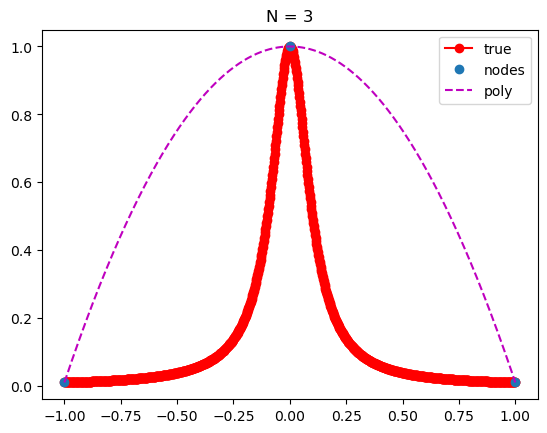

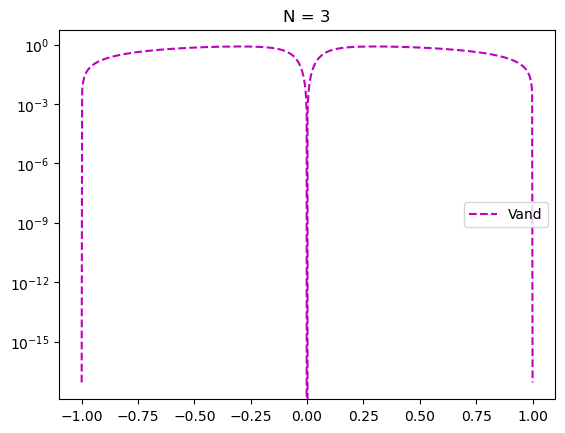

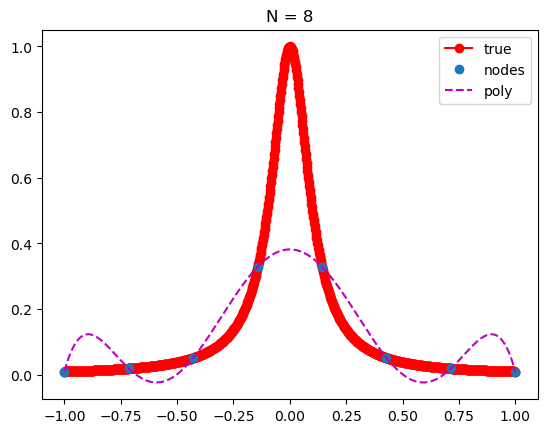

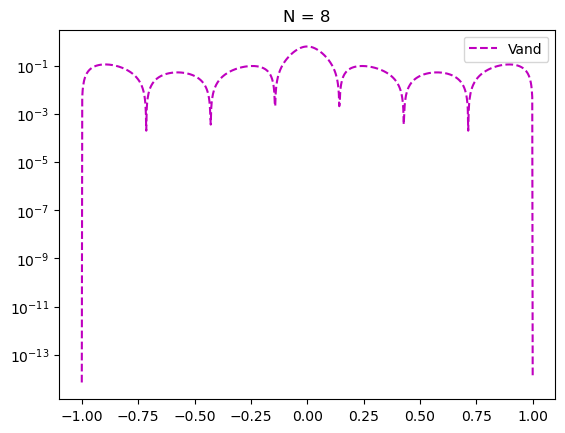

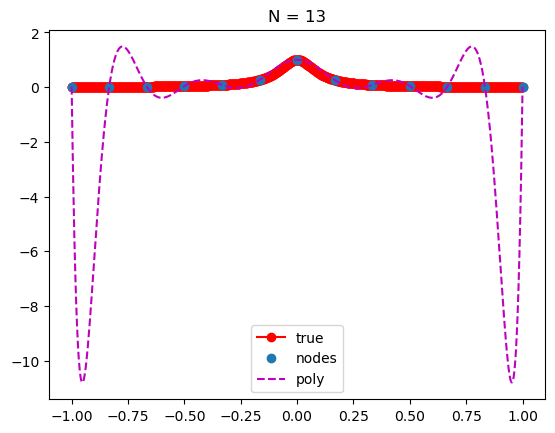

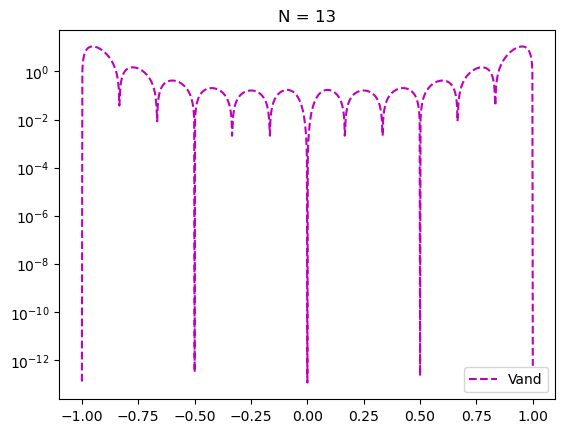

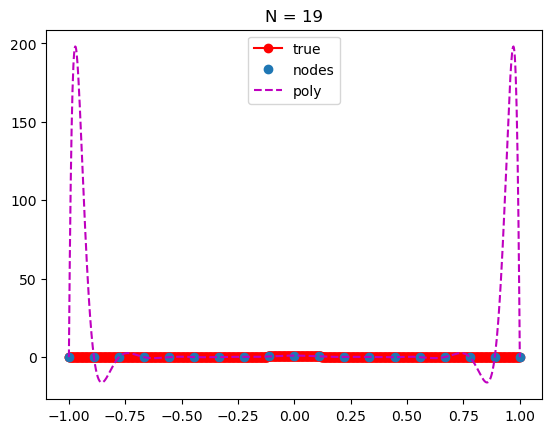

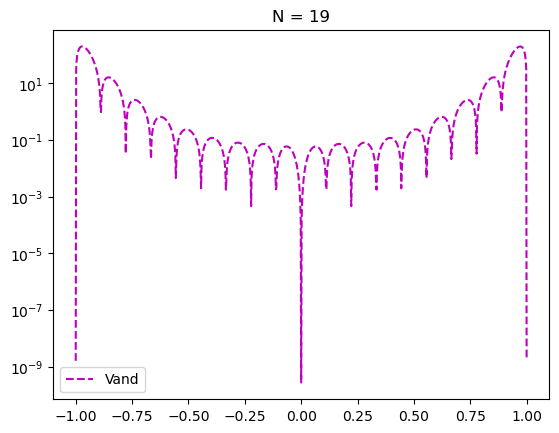

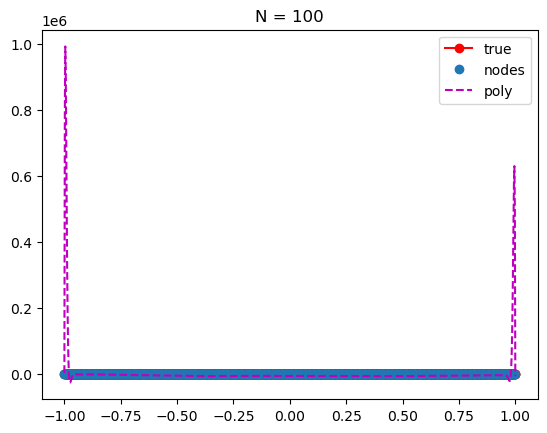

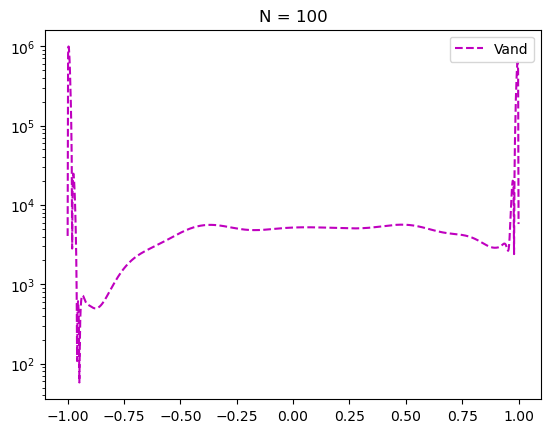

(None, None, None, None, None)

In [83]:
driver(3),driver(8), driver(13),driver(19),driver(100)

The polynomial becomes more and more accurate with an increase in N -- though behavior at the endpoints becomes significantly worse too. With a drastic N = 100, we have insane error relative to the actual function at the ends. With an odd number of nodes, we hit the peak point.

# 2

In [101]:
def bary_maker(xint, yint, x, N):
    '''first formula'''
    phi = 1
    w = np.ones(N)
    
    
    for j in range(N):
        phi = phi*(x - xint[j])
        
        for i in range(N):
            if i != j:
                w[j] = w[j]*( xint[j] - xint[i] )    
        w[j] = 1/w[j]
    result = 0
    
    
    for n in range(N):
        if (x - xint[n])!=0:
            result += (w[n]*yint[n])/(x - xint[n])
    return phi*result


In [102]:

def driver(N):


    f = lambda x: 1/(1 + (10*x)**2)

    #N = 10
    ''' interval'''
    a = -1
    b = 1
   

    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N)
    
    ''' create interpolation data'''
    yint = f(xint)
        
    
    ''' create points'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_b = np.zeros(Neval+1)
  

    for kk in range(Neval+1):
        yeval_b[kk] = bary_maker(xint, yint, xeval[kk], N)


    ''' create vector with exact values'''
    fex = f(xeval)
     

    plt.figure()
    plt.title('N = ' + str(N))
    plt.plot(xeval,fex,'ro-', label = "true")
    plt.plot(xint,yint,'o', label='nodes')
    plt.plot(xeval,yeval_b,'m--',  label = "barycentric")
    plt.legend()

    plt.figure()
    plt.title('N = '+str(N))
    err_b = abs(yeval_b-fex)
    plt.semilogy(xeval,err_b,'m--',label='barycentric')
    plt.legend()
    plt.show()

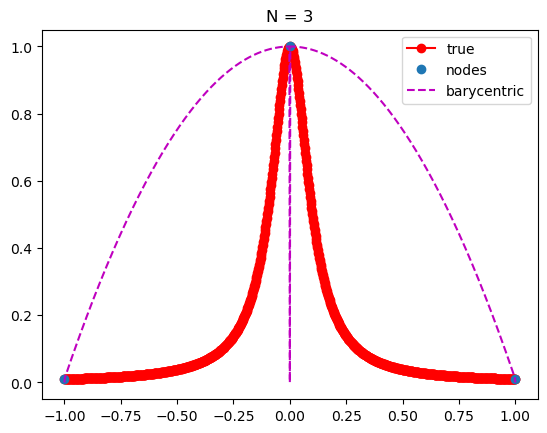

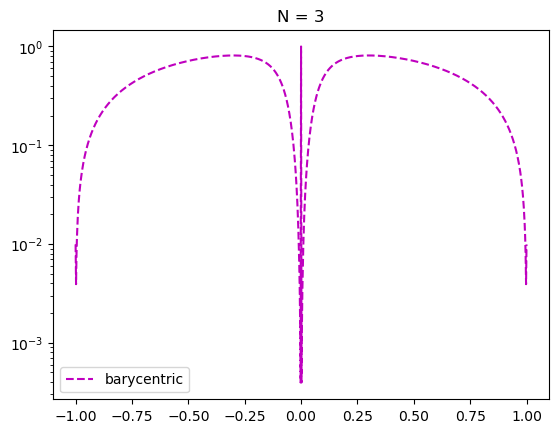

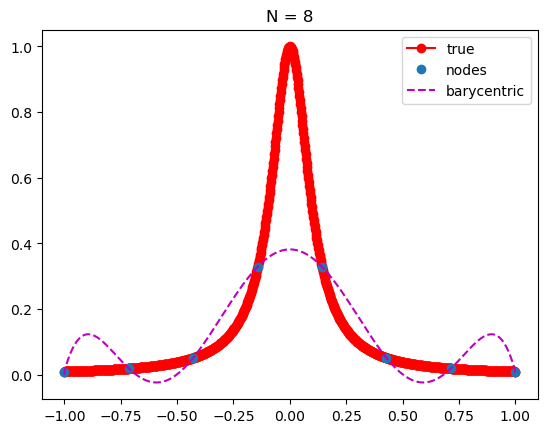

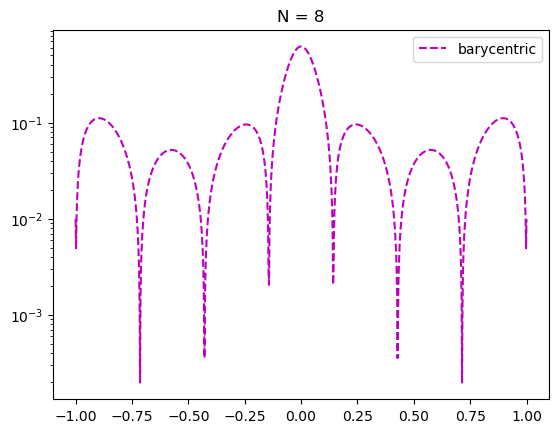

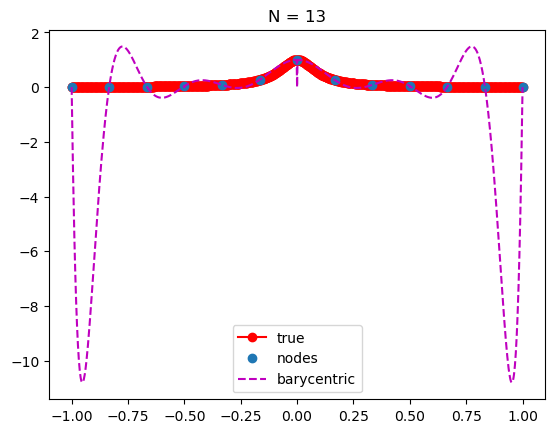

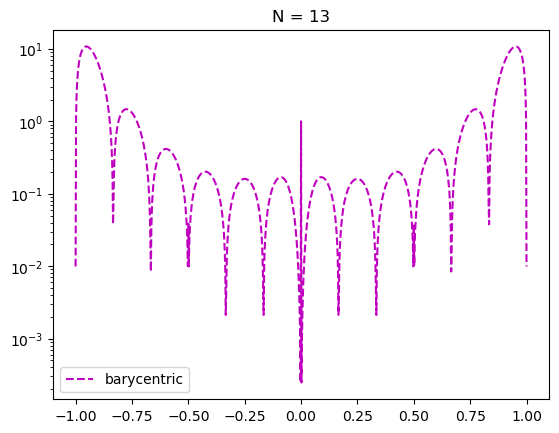

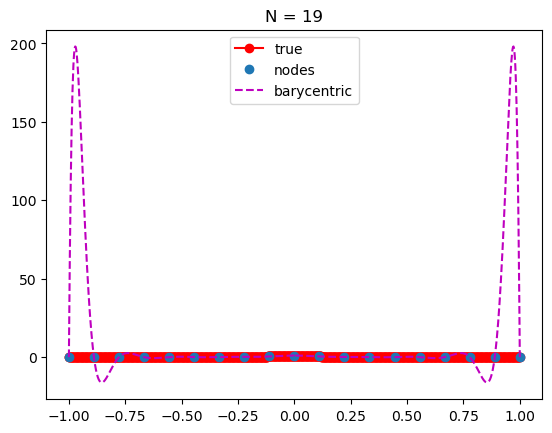

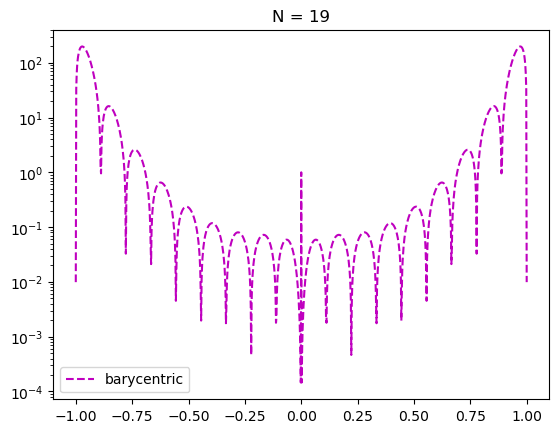

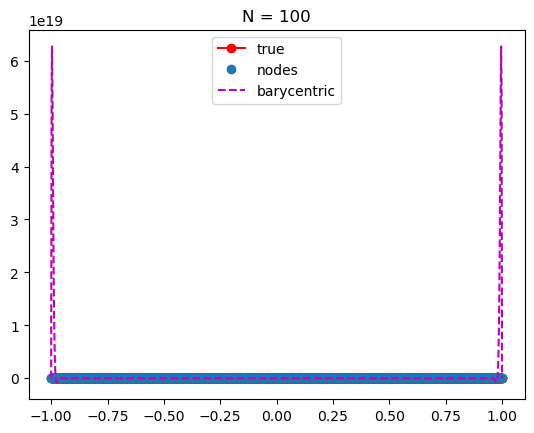

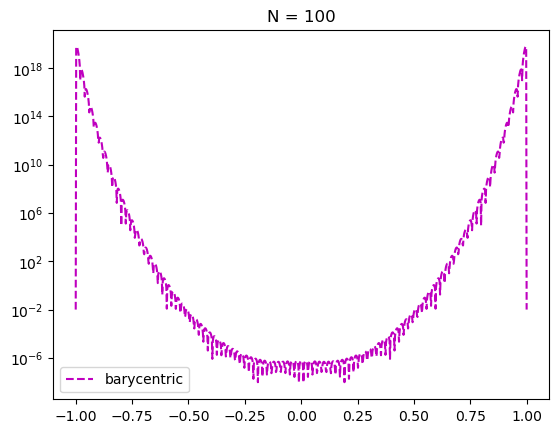

(None, None, None, None, None)

In [103]:
driver(3),driver(8), driver(13),driver(19),driver(100)

Clearly, the endpoints are still exhibiting the problematic behavior exhibited before. 

# 3

In [105]:
def driver(N):


    f = lambda x: 1/(1 + (10*x)**2)

    #N = 10
    ''' interval'''
    a = -1
    b = 1
   

    ''' create equispaced interpolation nodes'''
    xint = np.empty(N)
    
    for i in range(1, N+1):
        xint[i-1] = math.cos(((2*i - 1)*np.pi)/(2*N))
    
    ''' create interpolation data'''
    yint = f(xint)
        
    
    ''' create points'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_b = np.zeros(Neval+1)
  

    for kk in range(Neval+1):
        yeval_b[kk] = bary_maker(xint, yint, xeval[kk], N)


    ''' create vector with exact values'''
    fex = f(xeval)
     

    plt.figure()
    plt.title('N = ' + str(N))
    plt.plot(xeval,fex,'ro-', label = "true")
    plt.plot(xint,yint,'o', label='nodes')
    plt.plot(xeval,yeval_b,'m--',  label = "barycentric")
    plt.legend()

    plt.figure()
    plt.title('N = '+str(N))
    err_b = abs(yeval_b-fex)
    plt.semilogy(xeval,err_b,'m--',label='barycentric')
    plt.legend()
    plt.show()

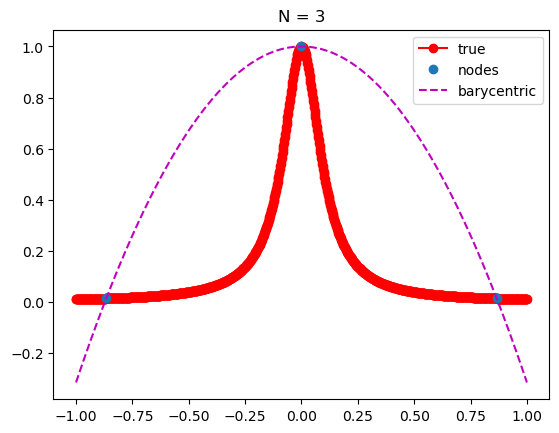

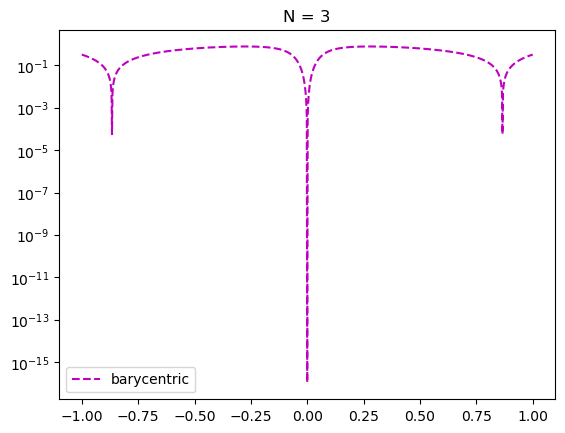

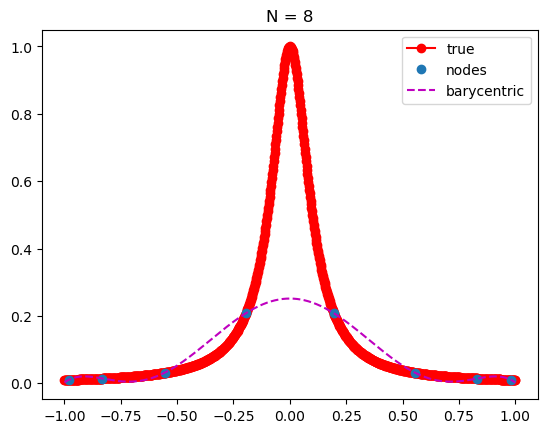

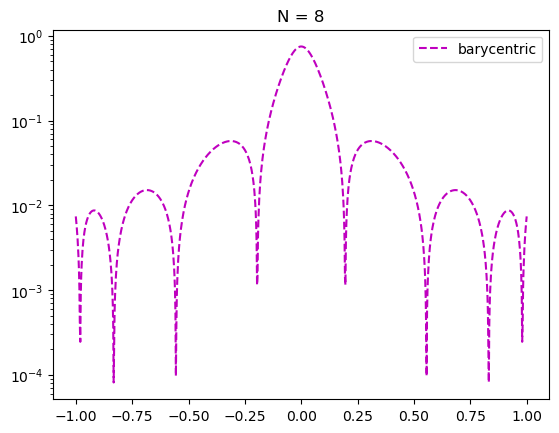

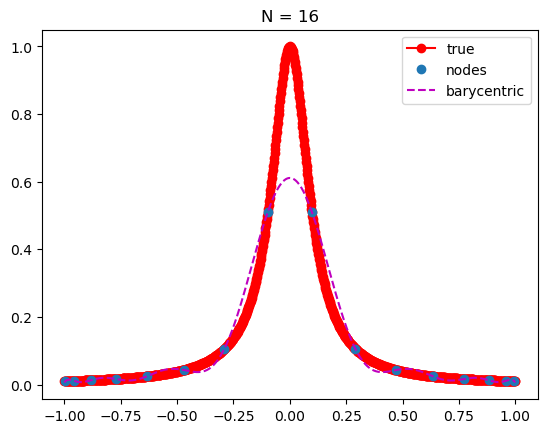

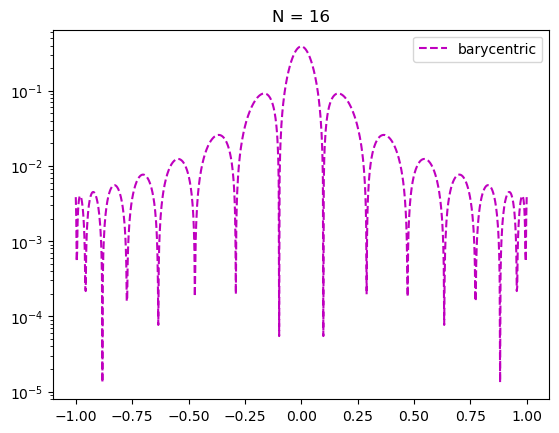

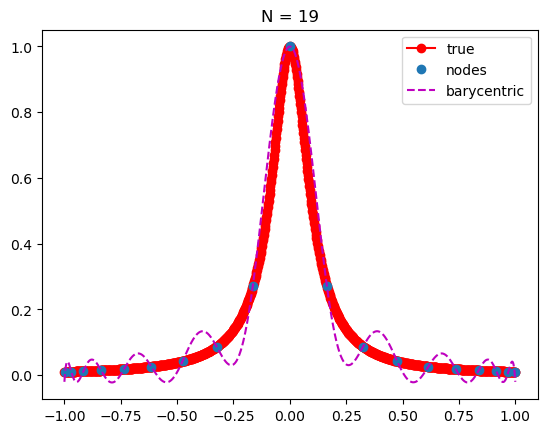

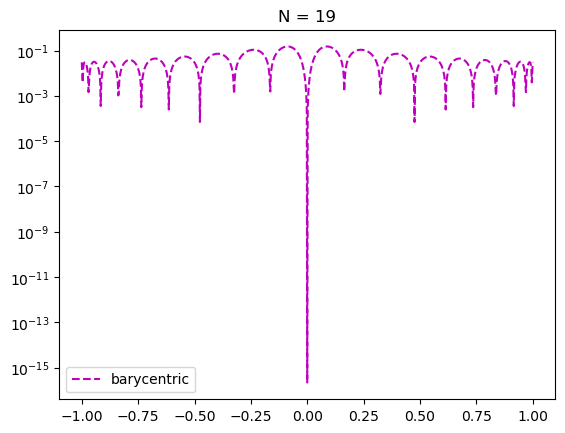

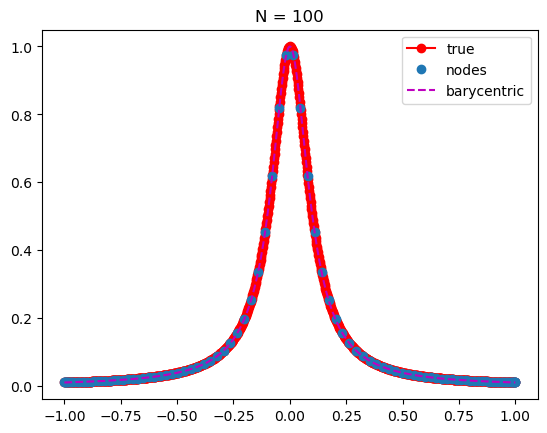

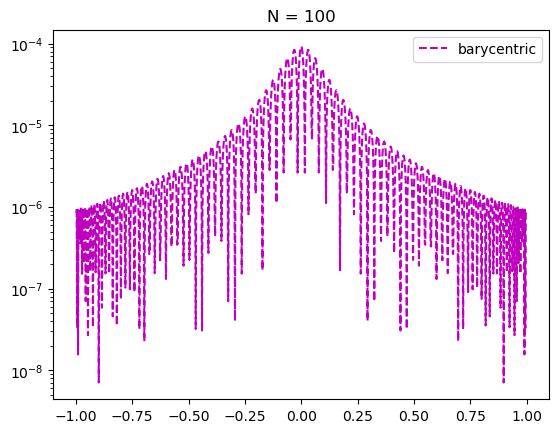

(None, None, None, None, None)

In [109]:
driver(3),driver(8), driver(16),driver(19),driver(100)

The plots back up what was the expected result: even with larger N values, the Chebyshev points allow for much more contained polynomial values at the end points. 